# t-SNE

In [1]:
from sklearn.manifold import TSNE
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio
from sklearn.metrics import silhouette_score
from Bio import SeqIO
import pandas as pd
import random

In [2]:
def get_seq(filename, get_header = False):
    assert filename.endswith('.fasta'), 'Not a fasta file.'
    
    records = list(SeqIO.parse(filename, "fasta"))
    records_seq = [i.seq for i in records]
    headers = [i.description for i in records]
    if get_header == True:
        return records_seq, headers
    else:
        return records_seq

1. t-SNE of SH3 domains

In [3]:
parameters = pickle.load(open("Input/SH3_fungi/SH3.db", 'rb'))
RE_load = scio.loadmat('Input/SH3_fungi/re.mat')['re'].flatten()
_, msaheader = get_seq('Input/SH3_fungi/fungi_59.fasta', get_header=True)
annotations = pd.read_excel('Input/SH3_fungi/annotations.xlsx')

v_traj_onehot = parameters['onehot'] # The one-hot encoded sequences
q_n = parameters['q_n'] # Number of possible residues on each position

N=np.size(v_traj_onehot,axis=0) #number of samples 
q=np.size(v_traj_onehot,axis=1) #number of one-hot features
n=np.size(q_n) # number of amino acid residues in a sequences

print("Number of samples = ", N)
print("Number of features = ", q)
print('Number of amino acids = ', n)

Number of samples =  5252
Number of features =  1169
Number of amino acids =  59


In [4]:
msaheader = np.array([int(i[4:]) for i in msaheader])
RE = RE_load[msaheader]
annotations['seq'] = annotations['seq'] -1

In [5]:
X_tsne = TSNE(n_components=2,random_state=0).fit_transform(v_traj_onehot)
# It takes a while to run t-SNE clustering

/Users/xinran/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/xinran/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


## 1. RE

colorbar: relative enrichment


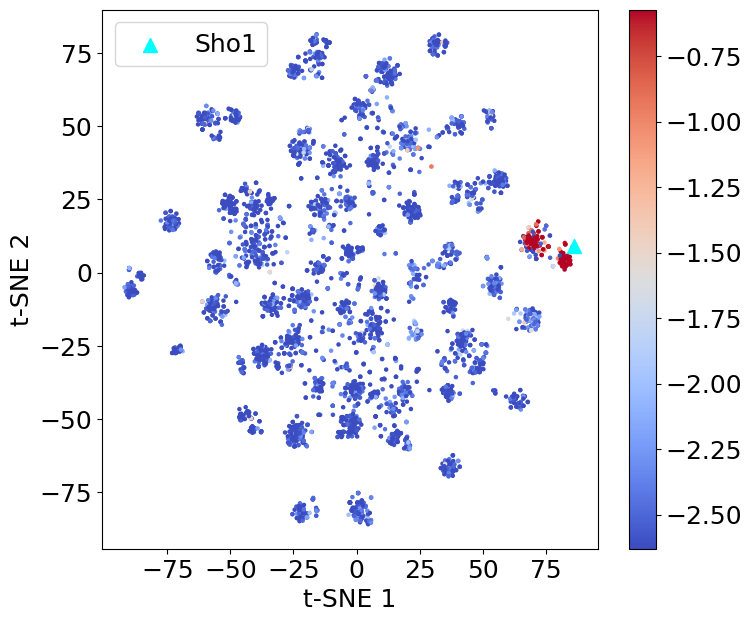

In [6]:
print('colorbar: relative enrichment')
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(8,7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=RE,cmap=plt.cm.coolwarm, s = 5, vmax = -0.5730, vmin = -2.63)
plt.colorbar()
plt.scatter(X_tsne[1193, 0], X_tsne[1193, 1],s=100,label="Sho1",marker='^',c='cyan')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.xticks(np.arange(-75,76,25))
plt.yticks(np.arange(-75,76,25))
plt.legend()
plt.show()

colorbar: relative enrichment


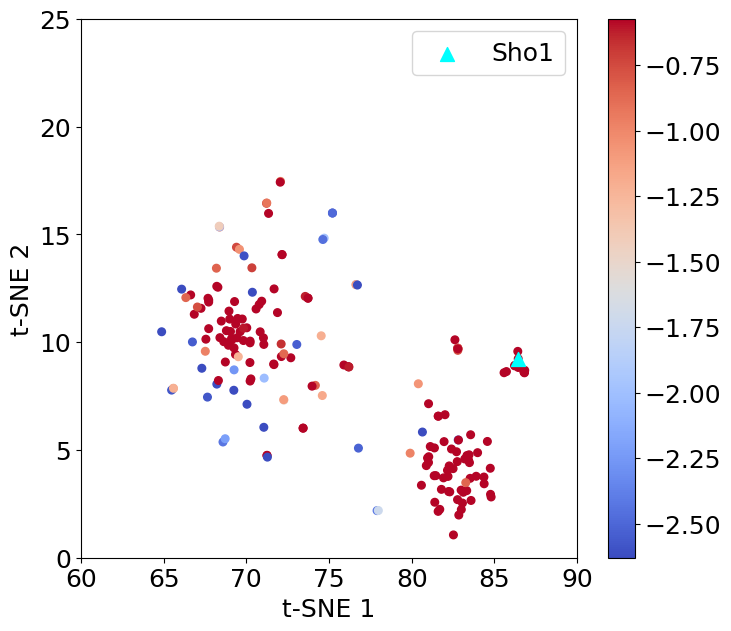

In [7]:
# Zoom in
print('colorbar: relative enrichment')
plt.figure(figsize=(8,7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=RE,cmap=plt.cm.coolwarm, s = 30, vmax = -0.5730, vmin = -2.63)
plt.colorbar()
plt.scatter(X_tsne[1193, 0], X_tsne[1193, 1],s=100,label="Sho1",marker='^',c='cyan')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.xlim([60,90])
plt.ylim([0,25])
plt.legend()
plt.show()

## 2. Function

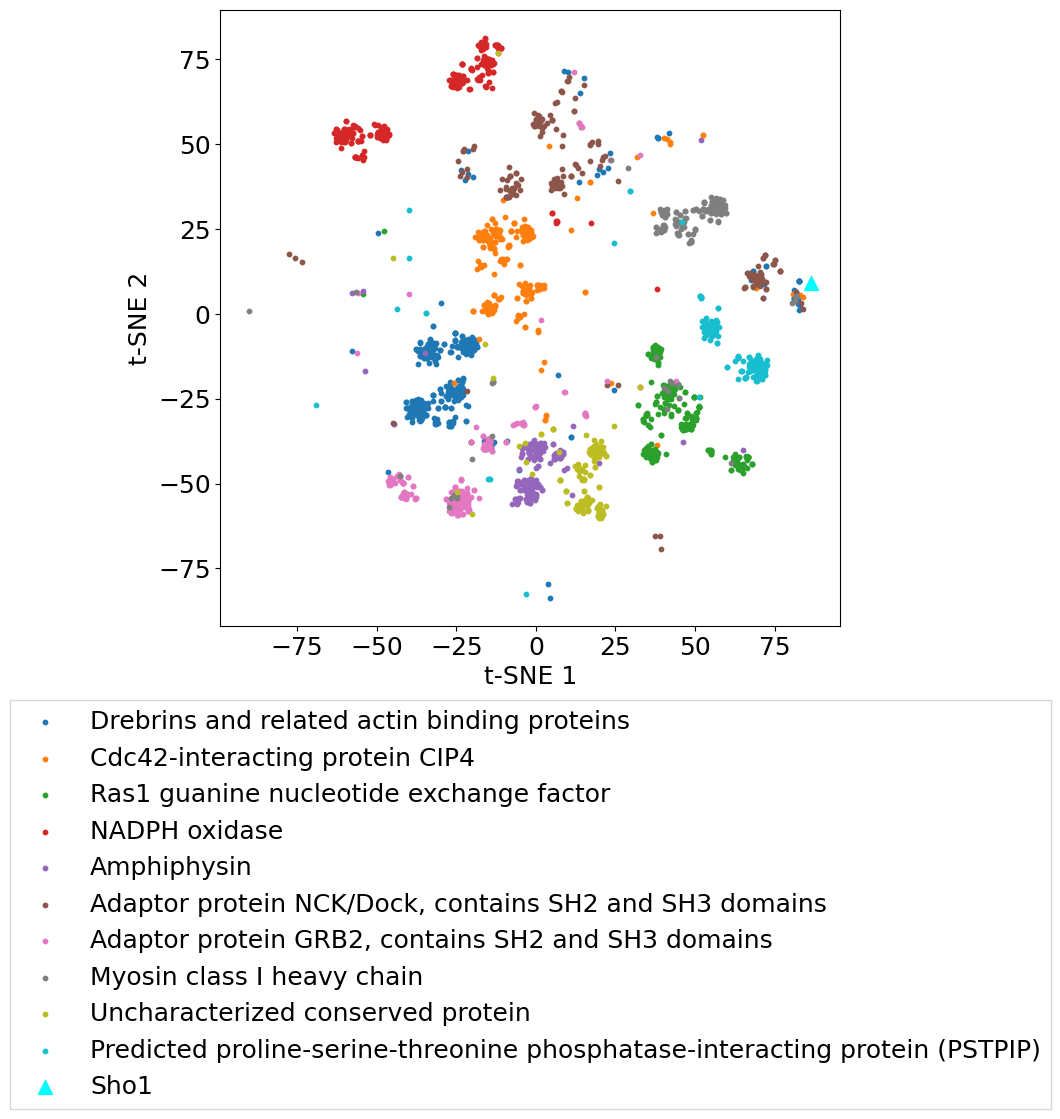

In [8]:
nf = 10
proteins = [annotations.loc[:,'Protein'].value_counts()[:20].index[i][1:-1] for i in range(nf)]
protein_list = []
for j in range(nf):
    tmplist = []
    for i in range(N):
        if proteins[j] in annotations.loc[msaheader[i],'Protein']:
            tmplist.append(i)
    protein_list.append(tmplist)
    
plt.figure(figsize=(8,8))
for i in range(len(proteins)):
    phy = protein_list[i]
    plt.scatter(X_tsne[phy,0], X_tsne[phy,1],s=10, label = proteins[i])
plt.scatter(X_tsne[1193, 0], X_tsne[1193, 1],s=100,label="Sho1",marker='^',c='cyan')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=False, shadow=False)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.xticks(np.arange(-75,76,25))
plt.yticks(np.arange(-75,76,25))
plt.show()

In [9]:
labellist=[]
xlist=[]
for i in range(N):
    for j in range(nf):
        if proteins[j] in annotations.loc[msaheader[i],'Protein']:
            labellist.append(j)
            xlist.append(i)
print('Silhouette score =',silhouette_score(X_tsne[xlist],labellist))

Silhouette score = 0.28186098


## 3. Phylogeny

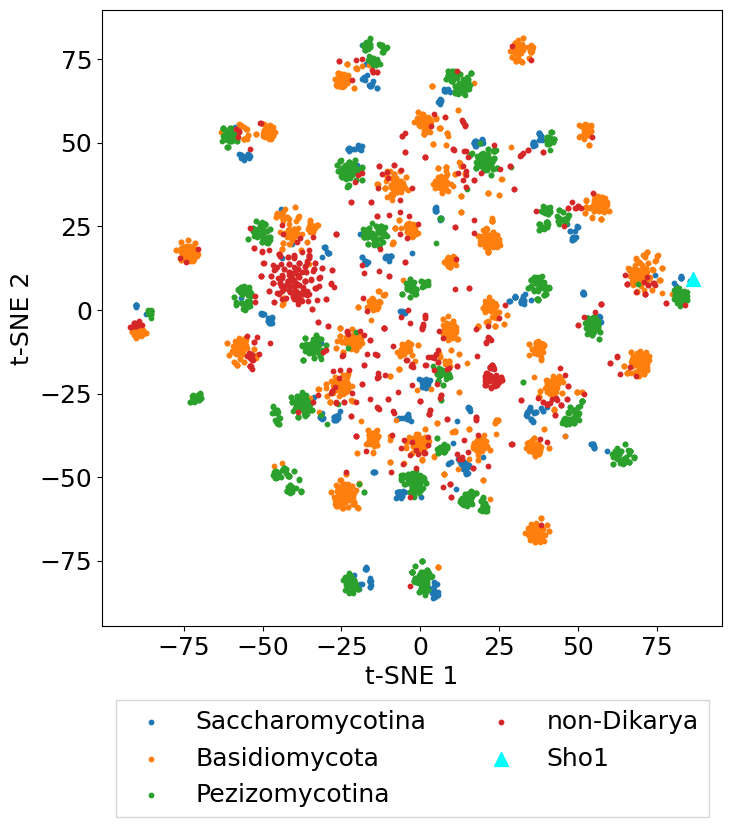

In [10]:
phylogen = ['Saccharomycotina', 'Basidiomycota', 'Pezizomycotina']
phy_list = []
for j in range(len(phylogen)):
    tmplist = []
    for i in range(N):
        if phylogen[j] in annotations.loc[msaheader[i],'Phylogeny']:
            tmplist.append(i)
    phy_list.append(tmplist)
phylogen.append('non-Dikarya')
tmplist = []
for i in range(N):
    if 'Dikarya' not in annotations.loc[msaheader[i],'Phylogeny']:
        tmplist.append(i)
phy_list.append(tmplist)

plt.figure(figsize=(8,8))
for i in [0,1,2,3]:
    phy = phy_list[i]
    plt.scatter(X_tsne[phy,0], X_tsne[phy,1],s=10, label = phylogen[i],c='C'+str(i))
plt.scatter(X_tsne[1193, 0], X_tsne[1193, 1],s=100,label="Sho1",marker='^',c='cyan')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=False, shadow=False, ncol = 2)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.xticks(np.arange(-75,76,25))
plt.yticks(np.arange(-75,76,25))
#plt.tight_layout()
plt.show()

In [11]:
labellist=[]
xlist=[]
np_iter=3
for i in range(N):
    for j in range(np_iter):
        if phylogen[j] in annotations.loc[msaheader[i],'Phylogeny']:
            labellist.append(j)
            xlist.append(i)
    if 'Dikarya' not in annotations.loc[msaheader[i],'Phylogeny'] and np_iter==3:
        labellist.append(3)
        xlist.append(i)
print(silhouette_score(X_tsne[xlist],labellist))

-0.07177595


In [12]:
# Pucciniomycotina 133
# Taphrinomycotina 75
# Agaricomycotina 1885
phylist_sample=[]
phylist_sample.append(phy_list[0])
for i in range(1,len(phy_list)):
    #print(len(phy_list[i]))
    sorted_sample = [
    phy_list[i][j] for j in sorted(random.sample(range(len(phy_list[i])), 626))
]
    phylist_sample.append(sorted_sample)

0.047977123

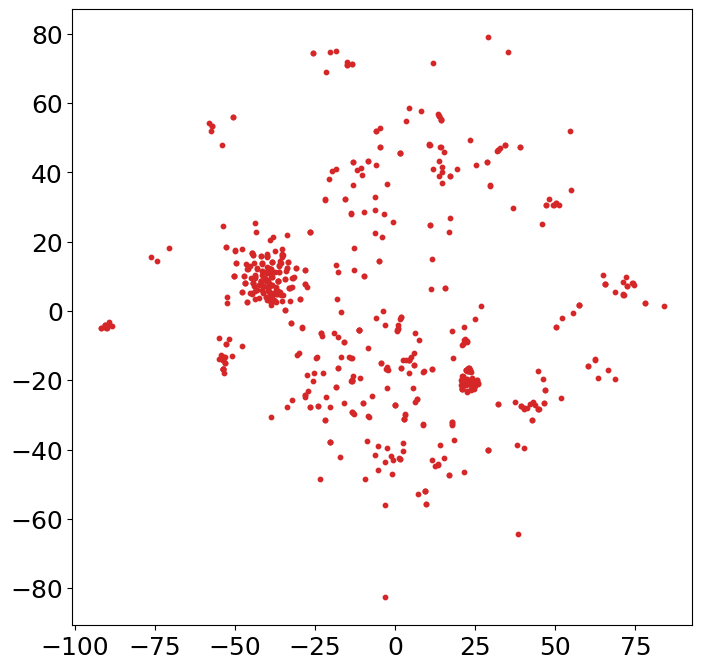

In [13]:
phy = phylist_sample[0]+phylist_sample[3]
phlist_l = [0]*len(phy_list[0]) + [1]*626
plt.figure(figsize=[8,8])
plt.scatter(X_tsne[phylist_sample[3],0], X_tsne[phylist_sample[3],1],s=10, label = phylogen[i],c='C'+str(i))
silhouette_score(X_tsne[phy],phlist_l)

## 4. Function & Phylogeny

Color: function, color scheme same as #2 
Shape: phylogeny (round:Saccharomycotina star:Pezizomycotina triangle:Basidiomycota)


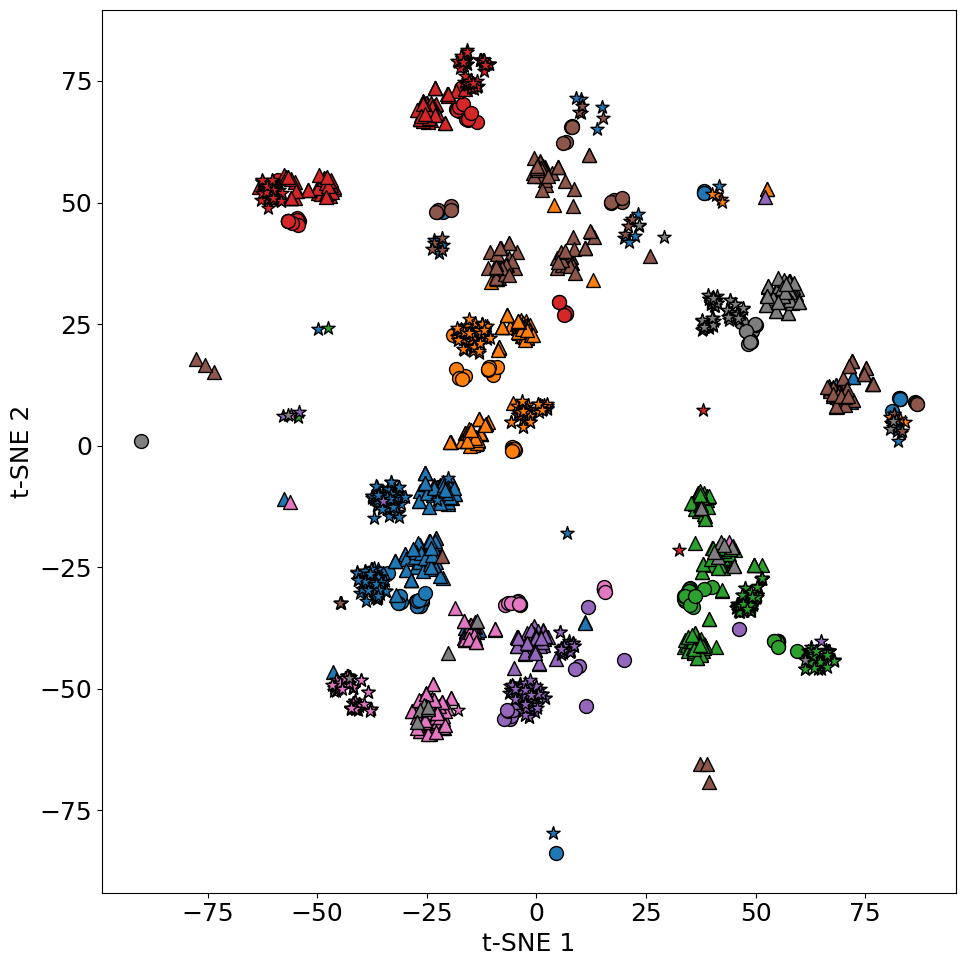

In [14]:
nf = 8 # n functions
nphy = 3 #n phylogeny
proteins = [annotations.loc[:,'Protein'].value_counts()[:20].index[i][1:-1] for i in range(nf)]
phylogen = ['Saccharomycotina', 'Basidiomycota', 'Pezizomycotina']
shapelist = ['o','^','*']
marker = shapelist*nf
edgelist = ['C0']*nphy+['C1']*nphy+['C2']*nphy+['C3']*nphy+['C4']*nphy+['C5']*nphy \
+['C6']*nphy+['C7']*nphy+['C8']*nphy+['C9']*nphy
protein_list = []
for j in range(nf):
    for k in range(nphy):
        tmplist = []
        for i in range(N):
            if proteins[j] in annotations.loc[msaheader[i],'Protein'] and \
            phylogen[k] in annotations.loc[msaheader[i],'Phylogeny']:
                tmplist.append(i)
        protein_list.append(tmplist)

print('Color: function, color scheme same as #2 \nShape: phylogeny (round:Saccharomycotina star:Pezizomycotina triangle:Basidiomycota)')
fig, axs = plt.subplots(1,1,figsize=[10,10])
for i in range(len(protein_list)):
    phy = protein_list[i]
    axs.scatter(X_tsne[protein_list[i],0], X_tsne[protein_list[i],1], s = 100, edgecolor = 'k',
                   marker = marker[i], c=edgelist[i])
axs.set_xlabel('t-SNE 1')
axs.set_ylabel('t-SNE 2')
#axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=False, shadow=False, ncol=1)
plt.tight_layout()
plt.show()

2. t-SNE for CM

In [12]:
cm_data = pd.read_excel('Input/CM/aba3304_Table_S1.xlsx',header=2) # natural seqs
cm_parameters = pickle.load(open("Input/CM/CM.db", 'rb'))
cm_onehot = cm_parameters['onehot']
cm_N=len(cm_parameters['seq'])

In [13]:
cm_RE=np.zeros(cm_N)
cm_RE[:] = np.nan
for i in range(cm_N):
    for j in range(len(cm_data['Sequence'])):
        if cm_parameters['seq'][i]==cm_data['Sequence'][j]:
            cm_RE[i]=cm_data['norm r.e.'][j]
            break

In [14]:
Xcm_tsne = TSNE(n_components=2,random_state=0).fit_transform(cm_onehot)

colorbar: normalized relative enrichment (E. Coli CM = 1.0)


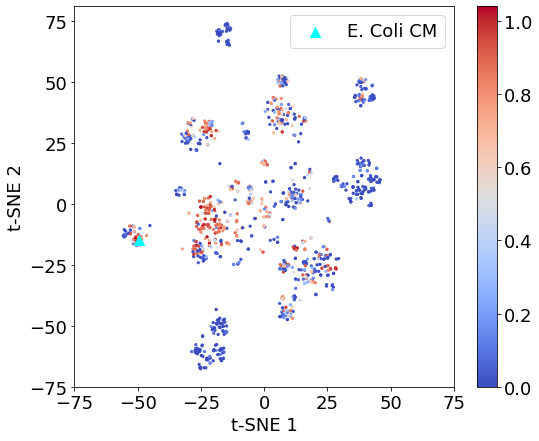

In [15]:
print('colorbar: normalized relative enrichment (E. Coli CM = 1.0)')
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(8.5,7))
plt.scatter(Xcm_tsne[:, 0], Xcm_tsne[:, 1], c=cm_RE,cmap=plt.cm.coolwarm, s = 5, vmin = 0.0)
plt.colorbar()
plt.scatter(Xcm_tsne[0, 0], Xcm_tsne[0, 1],s=100,label="E. Coli CM",marker='^',c='cyan')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.xticks(np.arange(-75,76,25))
plt.yticks(np.arange(-75,76,25))
plt.legend()
plt.show()